In [6]:
### Dataset Analysis
from thermo_validity import validity
import numpy as np
cutoff = 143.957
# cutoff = np.inf
p_dataset = np.load("GPT_FA_rererun/m2_data_7.npy", allow_pickle=True)
generated = np.load("GPT_FA_rererun/generated_M2_7.npy",allow_pickle=True)
results = np.load("GPT_FA_rererun/results_candidates_7.npy")
print(len(p_dataset))
valid = validity(generated)
print(len(valid))
unique = np.unique(valid)
print(len(unique))
datalist = unique
n_dataset = np.unique(np.concatenate((p_dataset, unique), axis=0))
datalist = n_dataset[np.where(np.isin(n_dataset, p_dataset, invert=True))[0]]
print(len(datalist), len(results))
nonzero_results = results[np.where(results > 0)]
good_layouts = []
good_results = []
print("Optimization Results:", len(nonzero_results), len(results))
for i in range(len(results)):
    if results[i] < cutoff and results[i] > 0:
        good_layouts.append(datalist[i])
        good_results.append(results[i])
print("Good layouts", len(good_layouts))
good_layouts = np.asanyarray(good_layouts)
good_results = np.asanyarray(good_results)
indices = np.argsort(good_results)
sorted_results = good_results[indices]
sorted_layouts = good_layouts[indices]
print(sorted_results[:10], sorted_layouts[:10])
print("Mean of the good results:", np.mean(good_results))
print("Std of the good results:", np.std(good_results))
print("Mean non-zero results:", np.mean(nonzero_results))


FileNotFoundError: [Errno 2] No such file or directory: 'GPT_FA_rererun/m2_data_7.npy'

In [7]:
import numpy as np
from thermo_validity import validity
p_dataset = np.load("GPT_NA_psitest/M2_data_8_layouts.npy", allow_pickle=True)
p_results = np.load("GPT_NA_psitest/M2_data_8_results.npy", allow_pickle=True)
generated = np.load("GPT_NA_psitest/psiphi_generated_M2_8_aug_144_100max.npy",allow_pickle=True)
print(len(p_dataset), len(p_results))
valid = validity(generated)
print(len(valid))
unique = np.unique(valid)
print(len(unique))
# n_dataset = np.unique(np.concatenate((p_dataset, unique), axis=0))
# unique = n_dataset[np.where(np.isin(n_dataset, p_dataset, invert=True))[0]]
results = np.load("GPT_NA_psitest/results_candidates_8_psi_aug_144_100max0.npy")
mixed_results = np.concatenate((p_results, results), axis=0)
mixed_dataset = np.concatenate((p_dataset, unique), axis=0)
mixed_results = np.array(mixed_results)
mixed_dataset = np.array(mixed_dataset)
sorted_index = np.argsort(mixed_results)
mixed_results = mixed_results[sorted_index]
mixed_dataset = mixed_dataset[sorted_index]
#find the duplicates
final_results = []
for v in valid:
    index_v = np.where(np.isin(mixed_dataset, v))[0]
    if len(index_v) > 1:
        if mixed_results[index_v[0]] != 0:
            final_results.append(mixed_results[index_v[0]])
        else:
            final_results.append(mixed_results[index_v[1]])
    else:
        final_results.append(mixed_results[index_v[0]])
good_results = 0
cutoff = 144
for i in range(len(final_results)):
    if final_results[i] < cutoff and final_results[i] > 0:
        good_results += 1
print("Good results:", good_results)
print("Good results ratio:", good_results/len(final_results))
final_results = [x for x in final_results if x > 0]
print("lowest result:",min(final_results))



3121 3121
2991
1739
Good results: 2630
Good results ratio: 0.8793045804078904
lowest result: 129.19460311329522


In [9]:
import numpy as np
cutoff = 143.957
generated = np.load("GPT_FA_rererun/initial_10k.npy",allow_pickle=True)
results = np.load("GPT_FA_rererun/results_initial_10k.npy")
nonzero_results = results[np.where(results > 0)]
good_layouts = []
good_results = []
print("Optimization Results:", len(nonzero_results), len(results))
for i in range(len(results)):
    if results[i] < cutoff and results[i] > 0:
        good_layouts.append(generated[i])
        good_results.append(results[i])
print("Good layouts", len(good_layouts))
print("Mean Results", np.mean(good_results))
good_layouts = np.asanyarray(good_layouts)
good_results = np.asanyarray(good_results)
indices = np.argsort(good_results)
sorted_results = good_results[indices]
# sorted_results = np.asanyarray(sorted_results)/134.01
sorted_layouts = good_layouts[indices]
print(sorted_results[:60], sorted_layouts[:60])

3121 3121
2991
1739
Good results: 2802
Good results ratio: 0.9368104312938816
lowest result: 129.16711382408698


number of designs 2041
number of results 2041


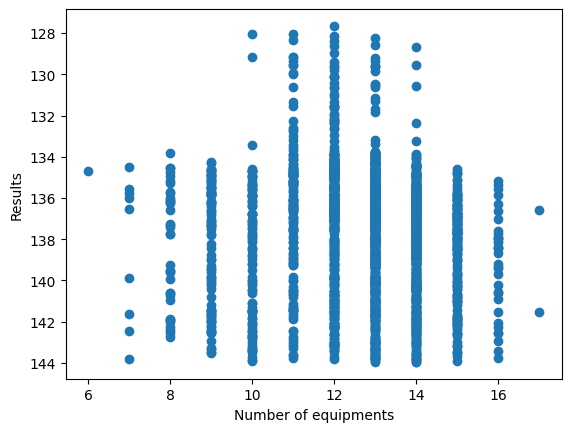

12.649191572758452 1.6997594962157225
137.72706518386045 3.0020945216874044
127.65077757018379 [0, 7, 4, 1, 5, 2, 3, 9, 5, 7, 4, 1, 4, 11]


In [1]:
import numpy as np
import config 
designs = np.load(config.DATA_DIRECTORY/"v22DF_m2_layouts.npy", allow_pickle=True)
results = np.load(config.DATA_DIRECTORY/"v22DF_m2_results.npy", allow_pickle=True)

from split_functions import string_to_equipment
equipments = string_to_equipment(designs)
print ("number of designs", len(equipments))
print("number of results", len(results))
lengths = []
for i in range(len(equipments)):
    lengths.append(len(equipments[i])-2)
lengths = np.array(lengths)
import matplotlib.pyplot as plt
plt.scatter(lengths, results)
plt.xlabel("Number of equipments")
plt.ylabel("Results")
plt.gca().invert_yaxis()
plt.show()
print(np.mean(lengths), np.std(lengths))
print(np.mean(results), np.std(results))
#the minimum result and the corresponding design
min_index = np.argmin(results)
print(results[min_index], equipments[min_index])

In [3]:
##Data combination and preparation for Psi or Phi
import numpy as np
from thermo_validity import validity
save_path = "LSTM_NA_psitest/"
max_dataset = 8
good_layouts = []
good_results = []
good_positions = []
cutoff = 143.957
designs = np.load(save_path+f"initial_10k.npy", allow_pickle=True)
results = np.load(save_path+f"results_initial_10k.npy", allow_pickle=True)
positions = np.load(save_path+f"positions_initial_10k.npy", allow_pickle=True)
Total_optimizations = 0
for j in range(len(results)):
    if results[j] < cutoff and results[j] > 0:
        good_layouts.append(designs[j])
        good_results.append(results[j])
        good_positions.append(positions[j])
for i in range(max_dataset):
    print(len(good_layouts), len(good_results))
    results = np.load(save_path+f"results_candidates_{i}.npy", allow_pickle=True)
    positions = np.load(save_path+f"positions_candidates_{i}.npy", allow_pickle=True)
    designs = np.load(save_path+f"generated_M2_{i}.npy", allow_pickle=True)
    Total_optimizations += len(results)
    v_u = np.unique(validity(designs))
    datalist = np.unique(np.concatenate((good_layouts, v_u), axis=0))
    v_u_n = datalist[np.where(np.isin(datalist, good_layouts, invert=True))[0]]
    v_u_n_results = results[np.where(np.isin(v_u_n, designs))[0]]
    v_u_n_positions = positions[np.where(np.isin(v_u_n, designs))[0]]
    for j in range(len(v_u_n_results)):
        if results[j] < cutoff and v_u_n_results[j] > 0:
            good_layouts.append(v_u_n[j])
            good_results.append(v_u_n_results[j])
            good_positions.append(v_u_n_positions[j])
print("Final number of layouts", len(good_layouts))
print("Final number of results", len(good_results))
print("Final number of positions", len(good_positions))
print("Total optimizations:", Total_optimizations)
good_positions = np.asanyarray(good_positions, dtype=object)
np.save(save_path+f"M2_data_F{max_dataset}_results.npy", good_results)
np.save(save_path+f"M2_data_F{max_dataset}_layouts.npy", good_layouts)
np.save(save_path+f"M2_data_F{max_dataset}_positions.npy", good_positions)


40 40
118 118
394 394
731 731
1243 1243
1857 1857
2623 2623
3480 3480
Final number of layouts 4267
Final number of results 4267
Final number of positions 4267
Total optimizations: 15246


In [ ]:
import numpy as np
from thermo_validity import validity
generated = np.load("GPT_NA_psitest/generated_M2_0.npy", allow_pickle=True)
previous_dataset = np.load("GPT_NA_psitest/initial_10k_good_layouts.npy", allow_pickle=True)
results = np.load("GPT_NA_psitest/results_candidates_0.npy", allow_pickle=True)
positions = np.load("GPT_NA_psitest/positions_candidates_0.npy", allow_pickle=True)
unique = np.unique(validity(generated))
v_u_n = unique[np.where(np.isin(unique, previous_dataset, invert=True))[0]]
print(len(v_u_n), len(results), len(positions))
for i in range(len(v_u_n)):
    if positions[i] !=0:
        print("Position:", positions[i], "Result:", results[i], "Layout:", v_u_n[i])
        break
# pressures in pascal
#temperatures in C
# flow in kg/s

2457 2457 2457
Position: [0.01, 32.0, 0.0, 29913249.317141537, 0.0, 448.3390961350221, 11.0, 36.741151038701666, 11.0, 7807856.004631445, 32.0, 30000000.0, 191.78993368206798, 59.539994239097915] Result: 194.30951266994145 Layout: G-1A1T1HaAaTACHE
